In [93]:
import os, struct
import matplotlib as plt
from array import array as pyarray
#from numpy import append, array, int8, uint8, zeros as np
import numpy as np
import pandas as pd
import openpyxl as pxl



In [94]:
labeln = 7
labelp = 8

# Excel Read Write Functions

In [95]:
#This function is used in the function readExcel(...) defined further below
def readExcelSheet1(excelfile):
    return (pd.read_excel(excelfile)).values

In [96]:
#This function is used in the function readExcel(...) defined further below
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    values=(pd.read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]

In [97]:
#This is the function you can actually use within your program.
#See manner of usage further below in the section "Prepare Data"
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    if data.shape==(1,1):
        return data[0,0]
    elif (data.shape)[0]==1:
        return data[0]
    else:
        return data

In [98]:
def writeExcelData(x, excelfile, sheetname, startrow, startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl')
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname, startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()



In [99]:
def getExcelWrite(excelfile, sheetname):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl')
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    return writer

In [100]:
def updateExcelData(x, writer, startrow, startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    df.to_excel(writer, sheet_name=sheetname, startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()

In [101]:
def closeExcel(x, writer):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    writer.close()

In [102]:
def writeExcelData2(x,excelfile,sheetname,startrow,startcol):
#    from pandas import DataFrame, ExcelWriter
#    from openpyxl import load_workbook
    df=pd.DataFrame(x)
    book = pxl.load_workbook(excelfile)
    writer = pd.ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

In [103]:
def getSheetNames(excelfile):
    return (pd.ExcelFile(excelfile)).sheet_names

# Check data

In [104]:
def vectortoimg(*args,width=28,size=1):
    n=len(args)
    fig=plt.figure()
    for i,arg in enumerate(args):
        plt.subplot(1,n,i+1)
        plt.imshow(arg.reshape(width,width),interpolation='None',cmap=cm.gray)
        plt.axis('off')
    fig.tight_layout(pad=0)
    fig.set_size_inches(W=n*size,h=size)
    plt.show()

# Read  Data

In [105]:
#excelfile=r"C:\Users\Soumyendu\AnacondaProjects\Srini\HW3\Assignment_3_ Submission_Template.xlsx"
excelfile=r"Assignment_3_Submission_Template_7-8.xlsx"

In [108]:
def load_mnist(dataset="training", digits=range(10), path='C:\\Users\\Soumyendu\\AnacondaProjects\\X4336\\HW3\\MNIST_data'):
    
    """
    Adapted from: http://cvxopt.org/applications/svm/index.html?highlight=mnist
    """

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels

In [109]:
from pylab import *
#from numpy import *
import scipy.sparse as sparse
import scipy.linalg as linalg

images, labels = load_mnist('training', digits=[labeln,labelp])

# converting from NX28X28 array into NX784 array
flatimages = list()
for i in images:
    flatimages.append(i.ravel())
X = np.asarray(flatimages)
T = np.asarray(labels)


Check shape of matrix (12116, 784)
Check shape of labels (12116, 1)
Check Mins and Max Values 0 255

Check training vector by plotting image 



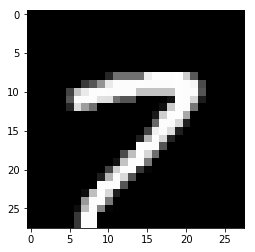

In [110]:
print("Check shape of matrix", X.shape)
print("Check shape of labels", T.shape)
print("Check Mins and Max Values",np.amin(X),np.amax(X))

"""
for i in range(10):
    print("Label = ", T[i])
    print("\nCheck training vector by plotting image \n")
    plt.imshow(X[i].reshape(28, 28),interpolation='None', cmap=cm.gray)
    show()
"""
#print("Label = ", T[i])
print("\nCheck training vector by plotting image \n")
plt.imshow(X[20].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()



# PCA Computation

In [111]:
#import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as pp

def plott(arr):
    pp.plot(arr)
    pp.show()


# Z

(784,)


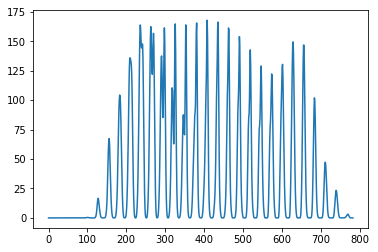

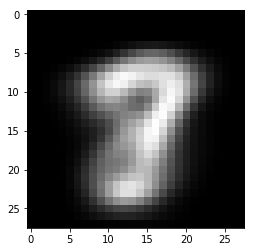

In [112]:
""" Z """
μ=np.mean(X,axis=0);
# print(μ)
print(μ.shape)
plott(μ)
plt.imshow(μ.reshape(28, 28),interpolation='None', cmap=cm.gray)
show()
#writeExcelData((μ,excelfile,"Results",2,2)

In [113]:

#A = np.ndarray(μ[300])
B = μ[300]
A = np.zeros(1)
A[0]=B
print(A.shape)
print(A)


(1,)
[ 111.46087818]


# Write Mean to Excel

In [114]:
print(μ.shape)
muX=np.reshape(μ, (1,784))
print(muX.shape)
#writeExcelData(muX[0:1,:], excelfile, 'Results', 2, 2)

(784,)
(1, 784)


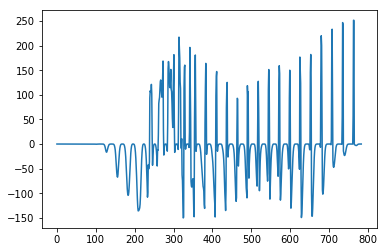

(12116, 784)


In [115]:
Z=X-μ
plott(Z[20])
print(Z.shape)


# C

(784, 784)


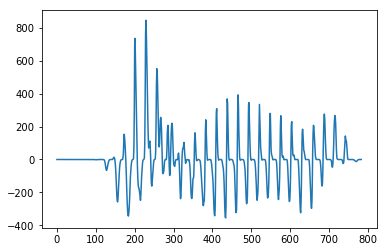

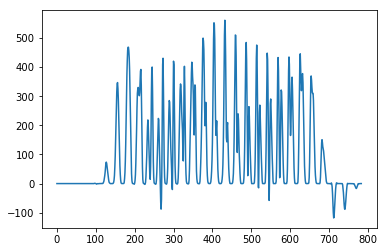

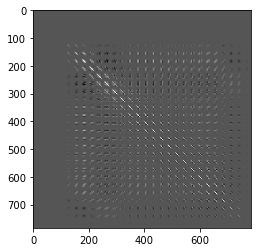

In [116]:
C=np.cov(Z,rowvar=False)
print(C.shape)
plott(C[200])
μC=np.mean(C,axis=0);
plott(μC)
plt.imshow(C,interpolation='None', cmap=cm.gray)
show()

# V  λ

(784,)
(784, 784)


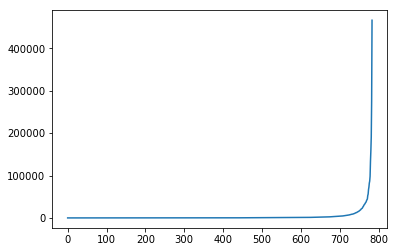

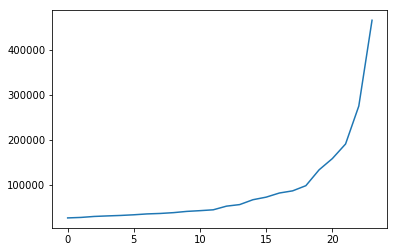

[  42786.30983986   44689.50538991   52816.21728405   56309.94897106
   67115.07431234   72849.0986861    82041.05198096   86845.67103274
   98330.40361352  133601.47815363  158571.51561749  191080.61522671
  275423.46807949  466278.67103573]


In [117]:
[λ,V]=LA.eigh(C)
#print(λ,'\n\n',V)
print(λ.shape)
print(V.shape)
plott(λ)
plott(λ[760:784])
print(λ[770:784])

In [118]:
λ=np.flipud(λ)
print(λ.shape)
print(λ[0:5])
V=np.flipud(V.T)
print(V.shape)
row=V[500,:]
#np.dot(C,row)/(λ[0]*row)
#print(row)


(784,)
[ 466278.67103573  275423.46807949  191080.61522671  158571.51561749
  133601.47815363]
(784, 784)


In [119]:
#writeExcelData(V[0:1,:], excelfile, 'Results', 3, 2)
#writeExcelData(V[1:2,:], excelfile, 'Results', 4, 2)

# Check V

In [120]:
np.linalg.norm(V[0])


1.0000000000000009

In [121]:
np.linalg.norm(V[1])

1.0000000000000002

In [122]:
dot(V[0,:],V[1,:])

3.7101398342453962e-16

(784,)


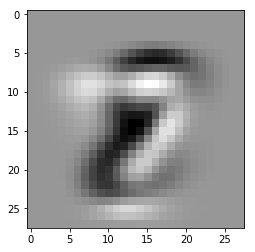

In [123]:
print(V[0].shape)
plt.imshow(V[0].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()


# P

(12116, 784)
(784,)


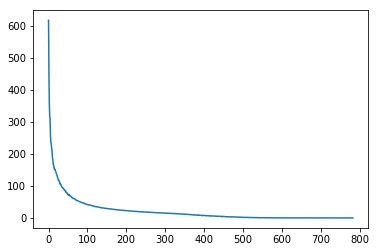

In [124]:
P=np.dot(Z,V.T)
print(P.shape) #Principal components
Pmod = np.absolute(P)
μP=np.mean(Pmod,axis=0);
print(μP.shape)
plott(μP)


In [125]:
# np.mean(P,axis=0)
print(P.shape)

(12116, 784)


In [126]:
R=np.dot(P,V)
print(R-Z) #Z is recovered since R-Z is seen to contain very small values

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [127]:
Xrec=R+μ
print(Xrec-X)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


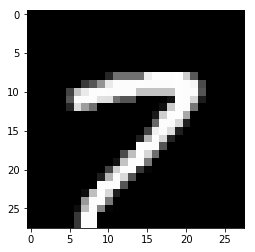

In [128]:
plt.imshow(Xrec[20].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()


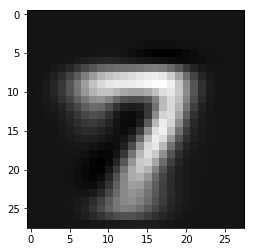

In [129]:
Xrec1=(np.dot(P[:,0:1],V[0:1,:]))+μ
#print(Xrec1) #Reconstruction using 1 component
plt.imshow(Xrec1[20].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()


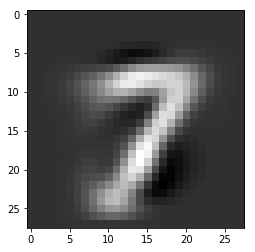

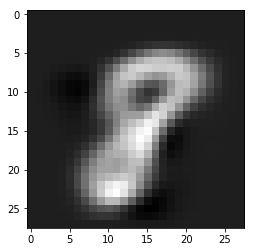

In [130]:
R2=(np.dot(P[:,0:2],V[0:2,:]))
Xrec2=R2+μ
#print(Xrec2) #Reconstruction using 2 components
plt.imshow(Xrec2[0].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()
plt.imshow(Xrec2[1].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()


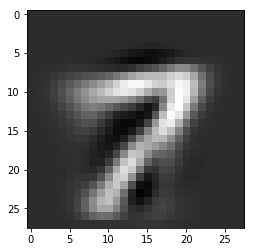

In [131]:
Xrec9=(np.dot(P[:,0:9],V[0:9,:]))+μ
#print(Xrec2) #Reconstruction using 2 components
plt.imshow(Xrec9[20].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()


In [132]:
Xrec18=(np.dot(P[:,0:18],V[0:18,:]))+μ
#vectortoimg(arange(784))
#vectortoimg(Xrec18[20].reshape(28, 28))

(12116, 4)


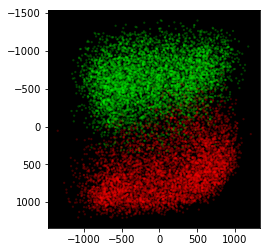

In [133]:
#Note that T contains class labels labeln and labelp (e.g. 5 & 6)
cols=zeros((alen(T),4));
print(cols.shape)
for i in range(alen(T)):
    if (T[i] ==labeln):
        cols[i]=[1,0,0,0.25];
    elif (T[i] ==labelp):
        cols[i]=[0,1,0,0.25];

randomorder=permutation(arange(alen(T))); #Don't worry about this stuff. Just makes a pretty picture
 
fig = figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(P[randomorder,1],P[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal');
gca().invert_yaxis();
show()

# Histogram Generation Functions

In [134]:
def pdf(x,mu,sigma):
    d=np.alen(mu)
    dfact1=(2*np.pi)**d
    dfact2=np.linalg.det(sigma)
    fact=1/np.sqrt(dfact1*dfact2)
    xc=x-mu
    isigma=np.linalg.inv(sigma)
    return fact*np.exp(-0.5*np.einsum('ij,jk,ik->i',xc,isigma,xc))

In [135]:
def plot2DHist(HF,HM):
    plt.subplot(1, 2, 1);
    plt.imshow(HF,interpolation='None',cmap=plt.get_cmap('gray'));
    plt.subplot(1, 2, 2);
    plt.imshow(HM,interpolation='None',cmap=plt.get_cmap('gray'));
    plt.show()

In [136]:
def GetNums(S):
    Fnum=0
    Mnum=0
    for i in range(0,S.shape[0]):
        if S[i]==labelp:
            Fnum+=1;
        if S[i]==labeln:
            Mnum+=1;
    return Fnum, Mnum

In [137]:
def GetSplitData(S,D,fnum,mnum):
    Fdata=np.zeros((2,fnum))
    Mdata=np.zeros((2,mnum))
    Fidx=0
    Midx=0
    for i in range(0,S.shape[0]):
        if S[i]==labelp:
            Fdata[0][Fidx]=D[i][0];
            Fdata[1][Fidx]=D[i][1];
            Fidx+=1;
        if S[i]==labeln:
            Mdata[0][Midx]=D[i][0];
            Mdata[1][Midx]=D[i][1];
            Midx+=1;
#        print(Fidx,Midx)
    return Fdata, Mdata

In [138]:
def GetFirstData(S):
    Pidx=-1
    Nidx=-1
    for i in range(0,S.shape[0]):
        if S[i]==labelp:
            if (Pidx == -1):
                Pidx = i
        if S[i]==labeln:
            if (Nidx == -1):
                Nidx = i
        if ((Pidx > -1) and (Nidx > -1)):
            break
    return Nidx, Pidx

In [139]:
def Build1HistogramClassifierNR(HT,HS,S,Hbins):
    HTmin=np.min(HT)
    HTmax=np.max(HT)
    HSmin=np.min(HS)
    HSmax=np.max(HS)

    HF=np.zeros((Hbins,Hbins))
    HM=np.zeros((Hbins,Hbins))
    
    Hmins=np.array([HTmin,HSmin])
    Hwidths=np.array([(HTmax-HTmin)/Hbins,(HSmax-HSmin)/Hbins])
    
    for i in range(0,S.size):
        bx=((Hbins-1)*(HT[i]-HTmin)/(HTmax-HTmin))
        by=((Hbins-1)*(HS[i]-HSmin)/(HSmax-HSmin))
        if ((bx-math.floor(bx)) >= 0.5):
            bx = math.floor(bx) + 1
        else:
            bx = math.floor(bx)
        if ((by-math.floor(by)) >= 0.5):
            by = math.floor(by) + 1
        else:
            by = math.floor(by)
            
        if S[i]==labelp:
            HF[bx][by]+=1;
        else:
            HM[bx][by]+=1;
    return HF,HM,Hmins,Hwidths

In [140]:
def CheckH(hist,bins):
    count=0.0
    for i in range(0,bins):
        for j in range(0,bins): 
            count+=hist[i][j]
    print(count)

In [141]:
def BayesianProb(val, num, dimn, mean, cov):
    covinv = np.linalg.inv(cov)
    diff = val-mean
    p1 = np.dot(diff,covinv)
    diffT = np.transpose(diff)
    p2 = np.dot(p1,diffT)
    numerator = math.exp(-1*(p2/2))
    
    det=np.linalg.det(cov)
    detsqrt = math.sqrt(det)
    denominator = 2*math.pi*detsqrt
    
    v = numerator/denominator
    v = v*num
    return v


In [142]:
def HistProbNR(histf, histm, val, offset, width, bins): 
    nbin = val - offset
    bx=((bins-1)*(nbin[0])/(bins*width[0]))
    by=((bins-1)*(nbin[1])/(bins*width[1]))
    if ((bx-math.floor(bx)) >= 0.5):
        bx = math.floor(bx) + 1
    else:
        bx = math.floor(bx)
    if ((by-math.floor(by)) >= 0.5):
        by = math.floor(by) + 1
    else:
        by = math.floor(by)

    pb = (histf[bx,by]/(histf[bx,by] + histm[bx,by])) #height return 
    return pb

In [143]:
def ReconstructH(num, bins, dimn, mean, cov,Hmin,Hwd):
    histcol=np.arange((Hmin[1]+(0.5*Hwd[1])),(Hmin[1]+(Hwd[1]*((Hbins)+0.4))), Hwd[1])
    histidx=np.arange((Hmin[0]+(0.5*Hwd[0])),(Hmin[0]+(Hwd[0]*((Hbins)+0.4))), Hwd[0])
    RH=np.zeros((bins,bins))
    W = Hwd[0]*Hwd[1]
    for i in range(0,bins):
        for j in range(0,bins):
            TestA=np.array([[histidx[i],histcol[j]]])
            Bp = BayesianProb(TestA, num, dimn, mean, cov)
            RH[i][j]=Bp*W
    return RH


# Histogram Generation

In [144]:
print(P[:,0:2].shape)

(12116, 2)


In [145]:
p1=P[:,0]
print(p1.shape)

(12116,)


In [146]:
p2=P[:,1]
print(p1.shape)

(12116,)


In [147]:
print(T.shape)

(12116, 1)


In [148]:
HT = p1
HS = p2
Fnum, Mnum = GetNums(T)
print(Fnum, Mnum)
HTmin=np.min(HT)
HTmax=np.max(HT)
HSmin=np.min(HS)
HSmax= np.max(HS)

FD, MD = GetSplitData(T,P[:,0:2],Fnum,Mnum)

FHT=FD[0]
FHS=FD[1]
HTFmin=np.min(FHT)
HTFmax=np.max(FHT)
HSFmin=np.min(FHS)
HSFmax= np.max(FHS)

HTFmean=np.mean(FHT)
HSFmean=np.mean(FHS)
HTFstd=np.std(FHT,ddof=1)
HSFstd=np.std(FHS,ddof=1)

MHT=MD[0]
MHS=MD[1]
HTMmin=np.min(MHT)
HTMmax=np.max(MHT)
HSMmin=np.min(MHS)
HSMmax= np.max(MHS)

HTMmean=np.mean(MHT)
HSMmean=np.mean(MHS)
HTMstd=np.std(MHT,ddof=1)
HSMstd=np.std(MHS,ddof=1)

print("Num Positives {} = {}, Num Negatives {} = {}".format(labelp, Fnum, labeln, Mnum))
print("P1: Min = {}, Max = {}".format(HTmin,HTmax))
print("P2: Min = {}, Max = {}".format(HSmin,HSmax))

print("Pos {} : P1: Min = {}, Max = {} : P2: Min = {}, Max = {}".format(labelp, HTFmin,HTFmax,HSFmin,HSFmax))
print("Pos {} : P1: Mean = {}, Std = {} : P2: Mean = {}, Std = {}".format(labelp, HTFmean,HTFstd,HSFmean,HSFstd))
print("Neg {} : P1: Min = {}, Max = {} : P2: Min = {}, Max = {}".format(labeln, HTMmin,HTMmax,HSMmin,HSMmax))
print("Neg {} : P1: Mean = {}, Std = {} : P2: Mean = {}, Std = {}".format(labeln, HTMmean,HTMstd,HSMmean,HSMstd))


5851 6265
Num Positives 8 = 5851, Num Negatives 7 = 6265
P1: Min = -1405.3511715417233, Max = 1209.0049751717909
P2: Min = -1345.4801614784299, Max = 1207.6798338982417
Pos 8 : P1: Min = -1405.3511715417233, Max = 434.1391587194712 : P2: Min = -1163.3141453981932, Max = 1174.3936367352348
Pos 8 : P1: Mean = -621.5347382925435, Std = 307.6271206220966 : P2: Mean = -93.63323005006065, Std = 500.13320804864685
Neg 7 : P1: Min = -932.9504160044632, Max = 1209.0049751717909 : P2: Min = -1345.4801614784299, Max = 1207.6798338982417
Neg 7 : P1: Mean = 580.4628497605222, Std = 340.01222219606757 : P2: Mean = 87.44581468841254, Std = 532.2114858163228


In [149]:
HTbins = 25
HSbins = 25
Hbins=25
print("HTbins = {}, HSbins = {}".format(HTbins,HSbins))

HTbins = 25, HSbins = 25


In [150]:
HF,HM,Hmin,Hwd = Build1HistogramClassifierNR(HT,HS,T,Hbins)

In [151]:
print(Hmin,Hwd)

[-1405.35117154 -1345.48016148] [ 104.57424587  102.12639982]


In [152]:
print(HF)
CheckH(HF,Hbins)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.
    0.   2.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   4.   0.   3.   3.   0.   7.
    2.   2.   5.   5.   6.   3.   4.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   1.   7.   8.   6.  10.  12.  14.  14.   8.  10.
   14.  11.  10.   5.   9.  12.   9.   8.   2.   0.   0.]
 [  0.   0.   0.   2.   6.   5.  10.  15.  27.  22.  22.  23.  15.  18.
   32.  13.  22.  17.  21.  19.  12.  15.   2.   1.   1.]
 [  0.   0.   0.   3.   9.   8.  29.  13.  24.  33.  26.  36.  37.  25.
   22.  30.  26.  36.  53.  29.  19.  20.   8.   2.   0.]
 [  0.   0.   2.   5.  12.  34.  30.  39.  45.  41.  36.  48.  39.  37.
   41.  38.  45.  42.  44.  38.  26.  16.   7.   3.   0.]
 [  0.   0.   2.  10.  24.  42.  40.  43.  43.  55.  50.  39.  42.  46.
   50.  39.  46.  54.  51.  39.  26.  23.   4.   2.   0.]
 [  0.   0.   3.  11.  31.  40.  57.  54.  49.  57.  41.  43.  54.  53.
   46.  47.  45.  

In [153]:
print(HM)
CheckH(HM,Hbins)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    1.   0.   0.   2.   0.   1.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.
    0.   0.   0.  

In [154]:
#print(X[0])

In [155]:
#print(X[1])

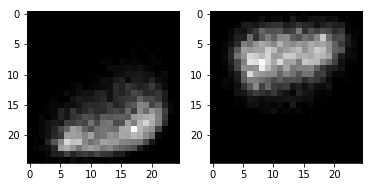

In [156]:
plot2DHist(HM,HF)

In [157]:
Fcov=np.cov(FD)
print(FD.shape)
print("Covariance Matrix : Female")
print(Fcov)

(2, 5851)
Covariance Matrix : Female
[[  94634.44534224  -34142.03309306]
 [ -34142.03309306  250133.22579303]]


In [158]:
Mcov=np.cov(MD)
print("Covariance Matrix : Male")
print(Mcov)

Covariance Matrix : Male
[[ 115608.31124271  -73240.91888741]
 [ -73240.91888741  283249.06563482]]


In [159]:
Fdet=np.linalg.det(Fcov)
Mdet=np.linalg.det(Mcov)
print("Determinant: Female = {} , male = {}".format(Fdet,Mdet))

Determinant: Female = 22505540660.861614 , male = 27381713939.64385


In [160]:
Fmean = np.array([[HTFmean,HSFmean]])
Mmean = np.array([[HTMmean,HSMmean]])

# 2 Feature Vector Testing

In [161]:
Nidx,Pidx=GetFirstData(T)
print(Nidx,T[Nidx][0],Pidx,T[Pidx][0]) 

0 7 1 8


In [162]:
#writeExcelData((μ,excelfile,"Results",2,2)
TestN=np.array([[p1[Nidx],p2[Nidx]]])
TestHN=np.array([p1[Nidx],p2[Nidx]])
Hpb = HistProbNR(HF,HM,TestHN,Hmin,Hwd,Hbins)
HpbN = 1.0-Hpb
Fpb = BayesianProb(TestN, Fnum, 2, Fmean, Fcov)
Mpb = BayesianProb(TestN, Mnum, 2, Mmean, Mcov)
BcondPN = Mpb / (Fpb + Mpb)
print("For Negative test data {}, Probability of Neg: Histogram = {}, Bayesian = {}".format(TestN,HpbN,BcondPN))

For Negative test data [[ 600.47317122  829.52281549]], Probability of Neg: Histogram = 1.0, Bayesian = 0.9999742659113278


In [163]:
TestP=np.array([[p1[Pidx],p2[Pidx]]])
TestHP=np.array([p1[Pidx],p2[Pidx]])
HpbP = HistProbNR(HF,HM,TestHP,Hmin,Hwd,Hbins)
Fpb = BayesianProb(TestP, Fnum, 2, Fmean, Fcov)
Mpb = BayesianProb(TestP, Mnum, 2, Mmean, Mcov)
BcondPP = Fpb / (Fpb + Mpb)
print("For Positive test data {}, Probability of Pos: Histogram = {}, Bayesian = {}".format(TestP,HpbP,BcondPP))

For Positive test data [[-734.36231541  733.6404572 ]], Probability of Pos: Histogram = 1.0, Bayesian = 0.9979990418924918


# Training Accuracy

In [164]:
def GetAcc(S,test_p1,test_p2,num,HF,HM,Hmin,Hwd,Hbins,Fnum,Fmean,Fcov,Mnum,Mmean,Mcov):
    Fhp=0
    Mhp=0
    Fbp=0
    Mbp=0
    Fpdfn=0
    Mpdfn=0
    for i in range(num):
        TestBP=np.array([[test_p1[i],test_p2[i]]])
        TestHP=np.array([test_p1[i],test_p2[i]])
        Hpb = HistProbNR(HF,HM,TestHP,Hmin,Hwd,Hbins)
        Fpb = BayesianProb(TestBP, Fnum, 2, Fmean, Fcov)
        Mpb = BayesianProb(TestBP, Mnum, 2, Mmean, Mcov)
        Fpdf = pdf(TestBP, Fmean, Fcov)
        Fpdf = Fpdf*Fnum
        Mpdf = pdf(TestBP, Mmean, Mcov)
        Mpdf = Mpdf*Mnum
#        PBcondP = Fpb / (Fpb + Mpb)
        if S[i]==labelp:
            if (Fpb > Mpb):
                Fbp+=1
            if (Fpdf > Mpdf):
                Fpdfn+=1
            if (Hpb > 0.5):
                Fhp+=1
        if S[i]==labeln:
            if (Fpb < Mpb):
                Mbp+=1
            if (Fpdf < Mpdf):
                Mpdfn+=1
            if (Hpb < 0.5):
                Mhp+=1
#        print(S[i],Hpb,Fhp+Mhp,Fpb,Mpb,Fbp+Mbp)
    Hacc=(Fhp+Mhp)/num
    Bacc=(Fbp+Mbp)/num
    BPacc=(Fpdfn+Mpdfn)/num
    return Hacc, Bacc, BPacc

In [165]:
Hacc,Bacc,BPacc=GetAcc(T,p1,p2,Fnum+Mnum,HF,HM,Hmin,Hwd,Hbins,Fnum,Fmean,Fcov,Mnum,Mmean,Mcov)
HaccPer=Hacc*100
BaccPer=Bacc*100

In [166]:
print("Histogram Acc = {}, Bayesian Acc = {}, PDF Bayesian Acc = {}".format(Hacc,Bacc,BPacc))

Histogram Acc = 0.9654176295807197, Bayesian Acc = 0.9650049521294156, PDF Bayesian Acc = 0.9650049521294156


# Writing to Excel

In [167]:
def writex(num,row,col):
    arr=np.array([[num]])
    writeExcelData(arr[0:1,:], excelfile, 'Results', row, col)

In [168]:
# mu (mean vector)
writeExcelData(muX[0:1,:], excelfile, 'Results', 2, 2)

# v1 (First eigenvector)
writeExcelData(V[0:1,:], excelfile, 'Results', 3, 2)
writeExcelData(V[1:2,:], excelfile, 'Results', 4, 2)

# Np (class +1 number of samples)
writex(Fnum,6,2)
writex(Mnum,7,2)

# mun (class +1 mean vector)
writex(HTFmean,9,2)
writex(HSFmean,9,3)
# mun (class -1 mean vector)
writex(HTMmean,10,2)
writex(HSMmean,10,3)

# cp (class +1 covariance matrix)
writeExcelData(Fcov[:,:], excelfile, 'Results', 12, 2)
# cn (class -1 covariance matrix)
writeExcelData(Mcov[:,:], excelfile, 'Results', 14, 2)

# Histogram range, pc1 direction
writex(HTmin,17,2)
writex(HTmax,17,3)

# Histogram range, pc2 direction
writex(HSmin,18,2)
writex(HSmax,18,3)

# Hp (class +1 histogram)
writeExcelData(HF[:,:], excelfile, 'Results', 20, 2)  

# Hp (class -1 histogram)
writeExcelData(HM[:,:], excelfile, 'Results', 46, 2)  

# Test +1 Vec
writeExcelData(X[Pidx:Pidx+1,:], excelfile, 'Results', 74, 2)
writeExcelData(Z[Pidx:Pidx+1,:], excelfile, 'Results', 75, 2)
writeExcelData(P[Pidx:Pidx+1,0:2], excelfile, 'Results', 76, 2)
writeExcelData(R2[Pidx:Pidx+1,:], excelfile, 'Results', 77, 2)
writeExcelData(Xrec2[Pidx:Pidx+1,:], excelfile, 'Results', 78, 2)

# Test -1 Vec
writeExcelData(X[Nidx:Nidx+1,:], excelfile, 'Results', 80, 2)
writeExcelData(Z[Nidx:Nidx+1,:], excelfile, 'Results', 81, 2)
writeExcelData(P[Nidx:Nidx+1,0:2], excelfile, 'Results', 82, 2)
writeExcelData(R2[Nidx:Nidx+1,:], excelfile, 'Results', 83, 2)
writeExcelData(Xrec2[Nidx:Nidx+1,:], excelfile, 'Results', 84, 2)

# xp Results
writex(labelp,88,2)
writex(labelp,89,2)
writex(HpbP,89,3)
writex(labelp,90,2)
writex(BcondPP,90,3)

# xn Results
writex(labeln,92,2)
writex(labeln,93,2)
writex(HpbN,93,3)
writex(labeln,94,2)
writex(BcondPN,94,3)

# Training accuracy attained using histograms
writex(HaccPer,97,2)

# Training accuracy attained using Bayesian
writex(BaccPer,98,2)



# Testing

In [169]:
test_images, test_labels = load_mnist('testing', digits=[labeln,labelp])

# converting from NX28X28 array into NX784 array
test_flatimages = list()
for i in test_images:
    test_flatimages.append(i.ravel())
test_X = np.asarray(test_flatimages)
test_T = np.asarray(test_labels)

(784,)


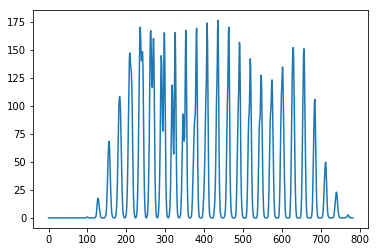

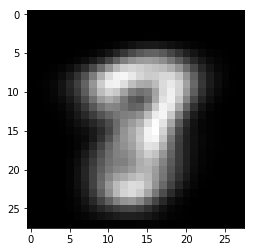

In [170]:
test_μ=np.mean(test_X,axis=0);
# print(μ)
print(test_μ.shape)
plott(test_μ)
plt.imshow(test_μ.reshape(28, 28),interpolation='None', cmap=cm.gray)
show()
#writeExcelData((μ,excelfile,"Results",2,2)

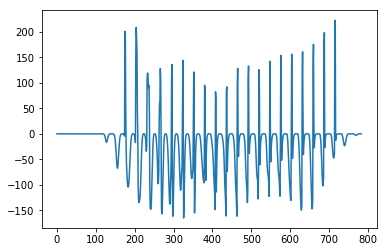

(2002, 784)


In [171]:
""" Z """
test_Z=test_X - μ
plott(test_Z[20])
print(test_Z.shape)

(2002, 784)
(784,)


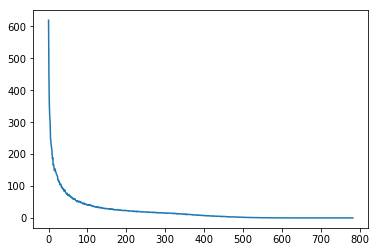

In [172]:
test_P=np.dot(test_Z,V.T)
print(test_P.shape) #Principal components
test_Pmod = np.absolute(test_P)
test_μP=np.mean(test_Pmod,axis=0);
print(test_μP.shape)
plott(test_μP)


In [173]:
test_p1=test_P[:,0]
test_p2=test_P[:,1]

In [174]:
test_R=np.dot(test_P,V)

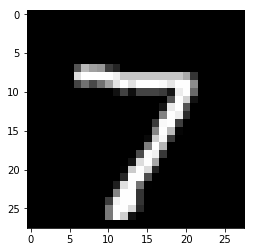

In [175]:
test_Xrec=test_R+μ
plt.imshow(test_Xrec[0].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()

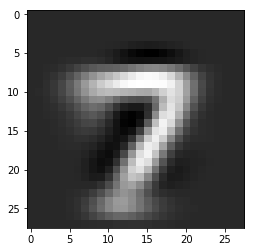

In [176]:
test_Xrec2=(np.dot(test_P[:,0:2],V[0:2,:]))+μ
plt.imshow(test_Xrec2[0].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()

In [177]:
Nidx,Pidx=GetFirstData(test_T)
print(Nidx,test_T[Nidx][0],Pidx,test_T[Pidx][0])  

0 7 7 8


In [178]:

#writeExcelData((μ,excelfile,"Results",2,2)
TestN=np.array([[test_p1[Nidx],test_p2[Nidx]]])
TestHN=np.array([test_p1[Nidx],test_p2[Nidx]])
Hpb = HistProbNR(HF,HM,TestHN,Hmin,Hwd,Hbins)
Hpb = 1.0-Hpb
Fpb = BayesianProb(TestN, Fnum, 2, Fmean, Fcov)
Mpb = BayesianProb(TestN, Mnum, 2, Mmean, Mcov)
NBcondP = Mpb / (Fpb + Mpb)
print("For Negative test data {}, Probability of Neg: Histogram = {}, Bayesian = {}".format(TestN,Hpb,NBcondP))

For Negative test data [[ 949.2917614   292.44453615]], Probability of Neg: Histogram = 1.0, Bayesian = 0.9999991004821511


In [179]:
TestP=np.array([[test_p1[Pidx],test_p2[Pidx]]])
TestHP=np.array([test_p1[Pidx],test_p2[Pidx]])
Hpb = HistProbNR(HF,HM,TestHP,Hmin,Hwd,Hbins)
Fpb = BayesianProb(TestP, Fnum, 2, Fmean, Fcov)
Mpb = BayesianProb(TestP, Mnum, 2, Mmean, Mcov)
PBcondP = Fpb / (Fpb + Mpb)
print("For Positive test data {}, Probability of Pos: Histogram = {}, Bayesian = {}".format(TestP,Hpb,PBcondP))

For Positive test data [[-640.44572148  524.60973429]], Probability of Pos: Histogram = 1.0, Bayesian = 0.9973418009207068


# Iterative Testing

In [180]:
test_Fnum, test_Mnum = GetNums(test_T)

In [181]:
print(test_T.shape[0])
print(test_Fnum,test_Mnum)

2002
974 1028


In [182]:
def GetTestAcc(S,test_p1,test_p2,num,HF,HM,Hmin,Hwd,Hbins,Fnum,Fmean,Fcov,Mnum,Mmean,Mcov):
    Fhp=0
    Mhp=0
    Fbp=0
    Mbp=0
    Fpdfn=0
    Mpdfn=0
    for i in range(num):
        TestBP=np.array([[test_p1[i],test_p2[i]]])
        TestHP=np.array([test_p1[i],test_p2[i]])
        Hpb = HistProbNR(HF,HM,TestHP,Hmin,Hwd,Hbins)
        Fpb = BayesianProb(TestBP, Fnum, 2, Fmean, Fcov)
        Mpb = BayesianProb(TestBP, Mnum, 2, Mmean, Mcov)
        Fpdf = pdf(TestBP, Fmean, Fcov)
        Fpdf = Fpdf*Fnum
        Mpdf = pdf(TestBP, Mmean, Mcov)
        Mpdf = Mpdf*Mnum
#        PBcondP = Fpb / (Fpb + Mpb)
        if S[i]==labelp:
            if (Fpb >= Mpb):
                Fbp+=1
            if (Fpdf > Mpdf):
                Fpdfn+=1
            if (Hpb > 0.5):
                Fhp+=1
        if S[i]==labeln:
            if (Fpb < Mpb):
                Mbp+=1
            if (Fpdf < Mpdf):
                Mpdfn+=1
            if (Hpb < 0.5):
                Mhp+=1
#        print(S[i],Hpb,Fhp+Mhp,Fpb,Mpb,Fbp+Mbp)
    Hacc=(Fhp+Mhp)/num
    Bacc=(Fbp+Mbp)/num
    BPacc=(Fpdfn+Mpdfn)/num
    return Hacc, Bacc, BPacc

In [183]:
Hacc,Bacc,BPacc=GetAcc(test_T,test_p1,test_p2,test_Fnum+test_Mnum,HF,HM,Hmin,Hwd,Hbins,Fnum,Fmean,Fcov,Mnum,Mmean,Mcov)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


In [184]:
print("Histogram Acc = {}, Bayesian Acc = {}, PDF Bayesian Acc = {}".format(Hacc,Bacc,BPacc))

Histogram Acc = 0.9425574425574426, Bayesian Acc = 0.958041958041958, PDF Bayesian Acc = 0.958041958041958
